In [13]:
import numpy as np

In [14]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

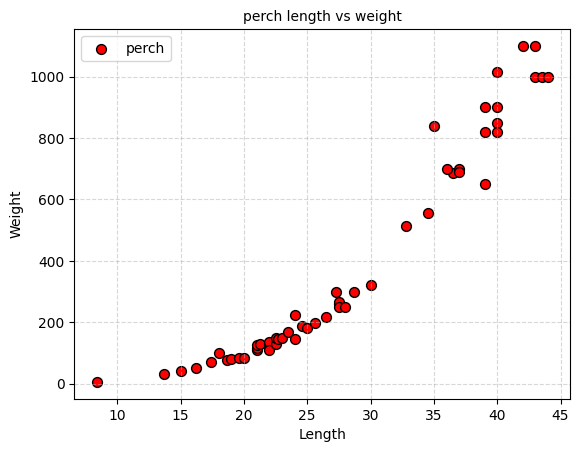

In [15]:
import matplotlib.pyplot as plt

# 산점도 그리기
plt.scatter(perch_length, perch_weight, label='perch', color='red', marker='o', edgecolors=(0, 0, 0), s= 50)


# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('perch length vs weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()



# 그래프 출력
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length,perch_weight,random_state=42
)

print(train_input[:10], test_input[:0], train_target[:10], test_target[:10])

print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22. ] [] [  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.] [  5.9 100.  250.  130.  130.  820.  320.  188.  900.  125. ]
(42,) (14,) (42,) (14,)


In [17]:
#예시
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

#사이킷런에 사용하려면 2차원 배열이어야함

test_array = test_array.reshape(2,2)
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)
[[1 2]
 [3 4]]
(2, 2)


In [18]:
train_input = train_input.reshape(42,1)
test_input = test_input.reshape(-1,1) #-1은 가지고 있는 것 모두라는 뜻

print(train_input[:5,:])
print()
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input,test_target))

0.992809406101064


In [20]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.157142857142862


In [21]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [22]:
knr.n_neighbors =3

#모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score    (train_input, train_target))

0.9804899950518966


In [23]:
print(knr.score(test_input,test_target))

0.9746459963987609


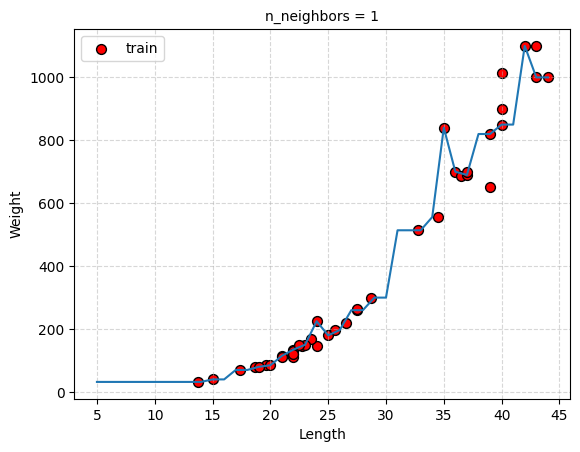

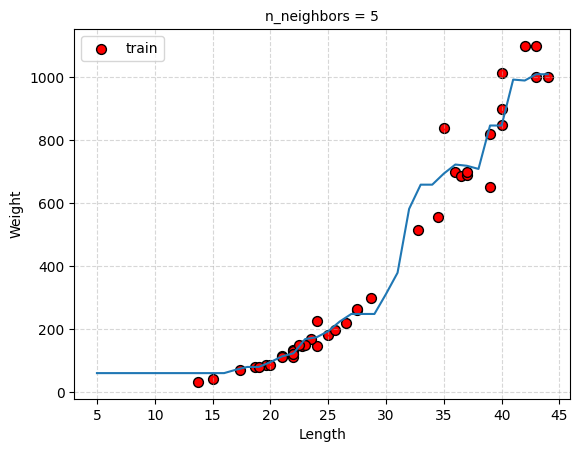

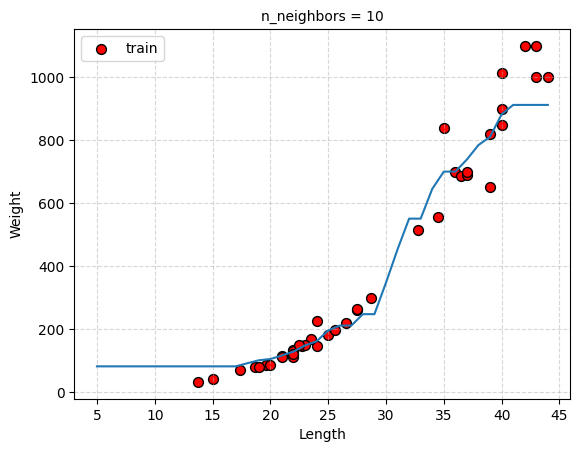

In [24]:
#k-최근접 이웃 회귀 객체를 만듭니다.
knr = KNeighborsRegressor()

#5에서 45까지 x좌표를 만듭니다.
x = np.arange(5, 45).reshape(-1,1)

#n = 1, 5, 10일 때 예츠그 결과를 그래프로 그립니다.

for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    
    
    
    import matplotlib.pyplot as plt

    # 산점도 그리기
    plt.scatter(train_input, train_target, label='train', color='red', marker='o', edgecolors=(0, 0, 0), s= 50)
    plt.plot(x,prediction)

    # 축 레이블 설정
    plt.xlabel('Length')
    plt.ylabel('Weight')

    # 제목 설정
    plt.title('n_neighbors = {}'.format(n), fontsize=10)

    # 그리드 표시
    plt.grid(True, linestyle='--', alpha=0.5)


    plt.legend()



    # 그래프 출력
    plt.show()